In [194]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [142]:
decades_df = pd.read_csv("../data/clean/decades/spotified_billboard_top_100_by_decade_FINAL.csv")
decades_df.head()

,song,performer,count,decade,main_performer,release_date,title,main_artist,spotify_id,spotify_link,...,liveness,loudness,mode,speechiness,tempo,time_signature,valence,explicit,genres,broad_genre
0,Radioactive,Imagine Dragons,87,2010,Imagine Dragons,2012-09-04,Radioactive,Imagine Dragons,4G8gkOterJn0Ywt6uhqbhp,spotify:track:4G8gkOterJn0Ywt6uhqbhp,...,0.6680,-3.686,1.0,0.0627,136.245,4.0,0.236,False,"['modern rock', 'rock']",rock
1,Sail,AWOLNATION,79,2010,AWOLNATION,2013-11-19,Sail,AWOLNATION,5xhQChGGhKLWqBqX4XhtYE,spotify:track:5xhQChGGhKLWqBqX4XhtYE,...,0.0953,-9.582,1.0,0.0568,119.038,4.0,0.243,False,"['la indie', 'modern alternative rock', 'moder...",rock
2,Counting Stars,OneRepublic,68,2010,OneRepublic,2014-01-01,Counting Stars,OneRepublic,6sy3LkhNFjJWlaeSMNwQ62,spotify:track:6sy3LkhNFjJWlaeSMNwQ62,...,0.1150,-4.972,0.0,0.0382,122.017,4.0,0.477,False,"['dance pop', 'neo mellow', 'piano rock', 'pop...",pop
3,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,68,2010,LMFAO,2011-01-01,Party Rock Anthem,LMFAO,0IkKz2J93C94Ei4BvDop7P,spotify:track:0IkKz2J93C94Ei4BvDop7P,...,0.2660,-4.210,0.0,0.1420,129.993,4.0,0.359,False,"['dance pop', 'pop', 'pop rap']",pop
4,Rolling In The Deep,Adele,65,2010,Adele,2011-01-19,Rolling in the Deep,Adele,1CkvWZme3pRgbzaxZnTl5X,spotify:track:1CkvWZme3pRgbzaxZnTl5X,...,0.0527,-5.119,1.0,0.0294,104.945,4.0,0.522,False,"['british soul', 'pop', 'uk pop']",pop


In [143]:
broad_genres_list = list(set(decades_df["broad_genre"].values))
broad_genres_list

['country', 'edm', 'pop', 'rock', 'unknown', 'rap']

In [144]:
decades_df["release_date"] = pd.to_datetime(decades_df["release_date"])

In [145]:
decades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 28 columns):
song                513 non-null object
performer           513 non-null object
count               513 non-null int64
decade              513 non-null int64
main_performer      513 non-null object
release_date        513 non-null datetime64[ns]
title               513 non-null object
main_artist         513 non-null object
spotify_id          513 non-null object
spotify_link        513 non-null object
popularity          513 non-null int64
acousticness        513 non-null float64
analysis_url        513 non-null object
danceability        513 non-null float64
duration_ms         513 non-null float64
energy              513 non-null float64
instrumentalness    513 non-null float64
key                 513 non-null float64
liveness            513 non-null float64
loudness            513 non-null float64
mode                513 non-null float64
speechiness         513 non-null float64


## Most and Least Appearances in the Billboard Hot 100 List

In [146]:
most_appearances = decades_df.sort_values("count", ascending=False)[["performer","song","count","release_date", "decade"]]
most_appearances.head(10)

,performer,song,count,release_date,decade
0,Imagine Dragons,Radioactive,87,2012-09-04,2010
1,AWOLNATION,Sail,79,2013-11-19,2010
92,Jason Mraz,I'm Yours,76,2012-09-24,2000
186,LeAnn Rimes,How Do I Live,69,2003-11-18,1990
2,OneRepublic,Counting Stars,68,2014-01-01,2010
3,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68,2011-01-01,2010
4,Adele,Rolling In The Deep,65,2011-01-19,2010
93,Carrie Underwood,Before He Cheats,64,2005-11-14,2000
94,Lifehouse,You And Me,62,2005-03-22,2000
5,The Lumineers,Ho Hey,62,2012-04-03,2010


Hmmm...that's strange. The top songs of the all the decades are primarily concentrated in the 2000s. What about the bottom songs?

In [147]:
least_appearances = decades_df.sort_values("count")[["performer","song","count","release_date", "decade"]]
least_appearances.head(10)

,performer,song,count,release_date,decade
512,The Watts 103rd Street Rhythm Band,Do Your Thing,17,1968-01-01,1960
511,Sue Thompson,Norman,17,2011-12-08,1960
499,Barrett Strong,Money (That's what I want),17,2003-01-01,1960
501,Brook Benton,Kiddio,17,2009-01-01,1960
502,Evie Sands,Any Way That You Want Me,17,1969-10-08,1960
503,Buster Brown,Fannie Mae,17,2010-07-27,1960
504,Jack Scott,Burning Bridges,17,2010-01-01,1960
500,Eddie Floyd,Knock On Wood,17,1967-01-01,1960
506,Randy & The Rainbows,Denise,17,2010-01-01,1960
507,Debbie Reynolds,Am I That Easy To Forget,17,2011-03-28,1960


Wow ok, so the songs that appeared the least on the Billboard Hot 100 List by decade are all older songs from the 1960s. This suggests that there is something going on with the number of weeks songs are on the Billboard Hot 100 List that is dependent on time. Was there a change in how the Billboard Hot 100 over the years? Does population growth tie in as a possible factor here? Was it more competitive to stay on the Billboard Hot 100 back then? There is some historical reason behind it that we cannot see just in this data alone.

There is also something strange when you compare release_date and decade values. Sometimes, it says that the songs were released in a totally different decade! Turns out the songs can be re-released in a later year but that is what is contained in the Spotify database as the release date. Therefore, the release date is an **unreliable** column for determining when a song was originally released.

...

    "name": "Essential Sue Thompson",
    
    "release_date": "2011-12-08",
    
    "release_date_precision": "day",
    
    "total_tracks": 14,
    
    "type": "album",
    
    "uri": "spotify:album:7yJzSeLuyRbgtE35OMXdzq"

...

## Most Re-occurring Artists

In [148]:
decades_df["performer"].value_counts().head()

Imagine Dragons    5
Maroon 5           4
Taylor Swift       4
Queen              3
The Fray           3
Name: performer, dtype: int64

In [149]:
decades_df.query("performer == 'Imagine Dragons'")

,song,performer,count,decade,main_performer,release_date,title,main_artist,spotify_id,spotify_link,...,liveness,loudness,mode,speechiness,tempo,time_signature,valence,explicit,genres,broad_genre
0,Radioactive,Imagine Dragons,87,2010,Imagine Dragons,2012-09-04,Radioactive,Imagine Dragons,4G8gkOterJn0Ywt6uhqbhp,spotify:track:4G8gkOterJn0Ywt6uhqbhp,...,0.668,-3.686,1.0,0.0627,136.245,4.0,0.236,False,"['modern rock', 'rock']",rock
6,Demons,Imagine Dragons,61,2010,Imagine Dragons,2012-09-04,Demons,Imagine Dragons,3LlAyCYU26dvFZBDUIMb7a,spotify:track:3LlAyCYU26dvFZBDUIMb7a,...,0.329,-3.015,1.0,0.0321,89.938,4.0,0.428,False,"['modern rock', 'rock']",rock
34,Believer,Imagine Dragons,51,2010,Imagine Dragons,2017-06-23,Believer,Imagine Dragons,0pqnGHJpmpxLKifKRmU6WP,spotify:track:0pqnGHJpmpxLKifKRmU6WP,...,0.081,-4.374,0.0,0.1280,124.949,4.0,0.666,False,"['modern rock', 'rock']",rock
35,Thunder,Imagine Dragons,51,2010,Imagine Dragons,2017-06-23,Thunder,Imagine Dragons,1zB4vmk8tFRmM9UULNzbLB,spotify:track:1zB4vmk8tFRmM9UULNzbLB,...,0.147,-4.833,1.0,0.0438,167.997,4.0,0.288,False,"['modern rock', 'rock']",rock
50,It's Time,Imagine Dragons,47,2010,Imagine Dragons,2015-12-18,I Love You All the Time (Play It Forward Campa...,Imagine Dragons,2POOvCjR09X41UNUWm12dT,spotify:track:2POOvCjR09X41UNUWm12dT,...,0.250,-2.862,1.0,0.0362,117.019,4.0,0.575,False,"['modern rock', 'rock']",rock


## Most Popular Song Genre

In [150]:
genre_count = decades_df["broad_genre"].value_counts()
genre_count

pop        271
rock       108
unknown     87
country     26
rap         20
edm          1
Name: broad_genre, dtype: int64

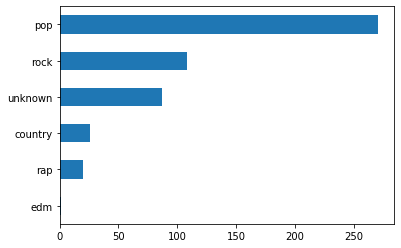

In [151]:
# overall
genre_count.sort_values().plot(kind='barh');

In [187]:
# by decade
genre_by_decade = decades_df.groupby(["decade","broad_genre"]).count()["song"]
genre_by_decade = genre_by_decade.reset_index()
genre_by_decade = genre_by_decade.set_index("decade")
genre_by_decade.head()

,broad_genre,song
decade,,
1960,country,7
1960,pop,36
1960,rock,6
1960,unknown,31
1970,country,4


<BarContainer object of 6 artists>

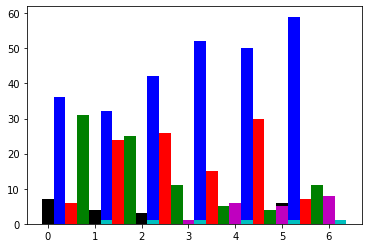

In [227]:
# grouped bar charts
country = genre_by_decade.query("broad_genre == 'country'")["song"].values
pop = genre_by_decade.query("broad_genre == 'pop'")["song"].values
rock = genre_by_decade.query("broad_genre == 'rock'")["song"].values
unknown = genre_by_decade.query("broad_genre == 'unknown'")["song"].values
rap = genre_by_decade.query("broad_genre == 'rap'")["song"].values
edm = genre_by_decade.query("broad_genre == 'edm'")["song"].values

for i in range(2):
    rap = np.insert(rap,0,0)

barWidth = 0.25

r1 = np.arange(len(country))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

plt.bar(r1, country, color="k", width=barWidth, label="country")
plt.bar(r2, pop, color="b", width=barWidth, label="pop")
plt.bar(r3, rock, color="r", width=barWidth, label="rock")
plt.bar(r4, unknown, color="g", width=barWidth, label="unknown")
plt.bar(r5, rap, color="m", width=barWidth, label="rap")
plt.bar(r6, edm, color="c", width=barWidth, label="edm")

<BarContainer object of 6 artists>

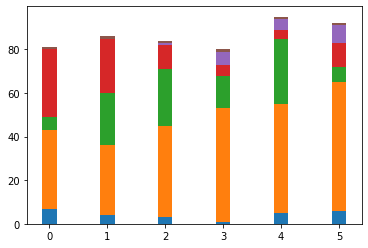

In [246]:
# stacked bar charts
plt.bar(r1, country, barWidth)
plt.bar(r1, pop, barWidth, bottom=country)
plt.bar(r1, rock, barWidth, bottom=pop+country)
plt.bar(r1, unknown, barWidth, bottom=pop+country+rock)
plt.bar(r1, rap, barWidth, bottom=pop+country+rock+unknown)
plt.bar(r1, edm, barWidth, bottom=pop+country+rock+unknown+rap)

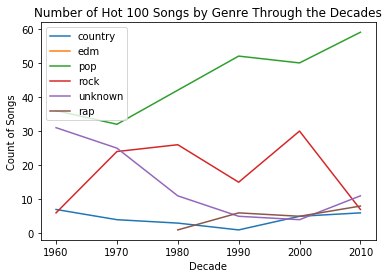

In [183]:
genre_by_decade = genre_by_decade.reset_index()
for g in broad_genres_list:
    plt.plot(genre_by_decade[genre_by_decade["broad_genre"] == g].set_index("decade")["song"], label=g);
plt.legend();
plt.title("Number of Hot 100 Songs by Genre Through the Decades");
plt.xlabel("Decade");
plt.ylabel("Count of Songs");

## Average and Median Spotify Metrics by Broad Genre Over Time

In [155]:
decades_df.columns

Index(['song', 'performer', 'count', 'decade', 'main_performer',
       'release_date', 'title', 'main_artist', 'spotify_id', 'spotify_link',
       'popularity', 'acousticness', 'analysis_url', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'explicit', 'genres', 'broad_genre'],
      dtype='object')

In [280]:
genre_by_decade_metrics = decades_df.groupby(["decade","broad_genre"]).agg({
                                                                    "acousticness":["mean"],
                                                                    "danceability":["mean"],
                                                                    "energy":["mean"],
                                                                    "instrumentalness":["mean"],
                                                                    "liveness":["mean"],
                                                                    "loudness":["mean"],
                                                                    "speechiness":["mean"],
                                                                    "tempo":["mean"],
                                                                    "valence":["mean"]
                                                                   })
genre_by_decade_metrics.columns = genre_by_decade_metrics.columns.map("_".join)
genre_by_decade_metrics = genre_by_decade_metrics.reset_index()
genre_by_decade_metrics.head()

,decade,broad_genre,acousticness_mean,danceability_mean,energy_mean,instrumentalness_mean,liveness_mean,loudness_mean,speechiness_mean,tempo_mean,valence_mean
0,1960,country,0.721857,0.549286,0.418257,0.000038,0.183429,-13.414143,0.050257,129.800571,0.734571
1,1960,pop,0.559094,0.570944,0.487611,0.102920,0.174417,-10.477889,0.040289,117.892222,0.685083
2,1960,rock,0.507533,0.473833,0.625833,0.208359,0.115633,-11.012667,0.034150,132.214000,0.685167
3,1960,unknown,0.625258,0.513677,0.448261,0.196218,0.218068,-12.150258,0.053319,116.482258,0.583442
4,1970,country,0.502725,0.491750,0.577750,0.000419,0.274400,-9.478750,0.043225,100.150750,0.726000


In [281]:
metrics_list = list(genre_by_decade_metrics.columns)[2:]
metrics_list

['acousticness_mean',
 'danceability_mean',
 'energy_mean',
 'instrumentalness_mean',
 'liveness_mean',
 'loudness_mean',
 'speechiness_mean',
 'tempo_mean',
 'valence_mean']

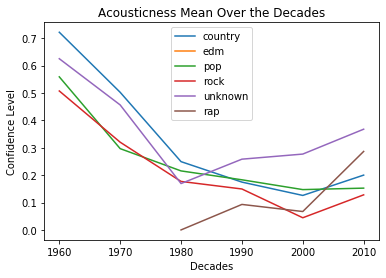

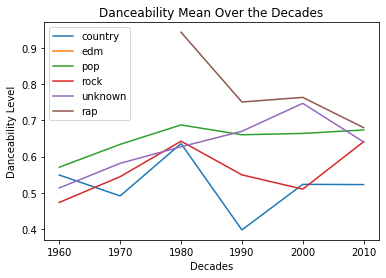

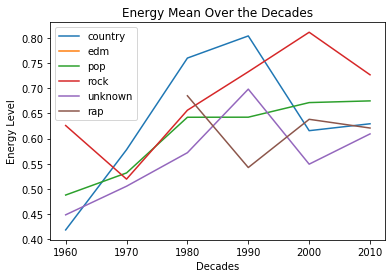

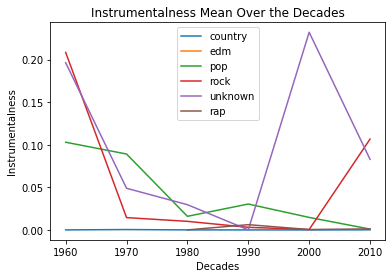

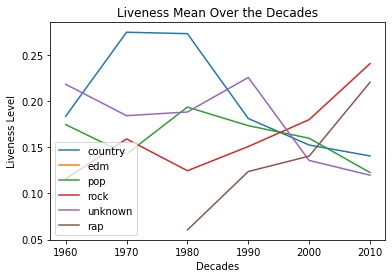

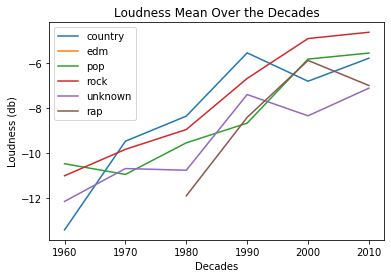

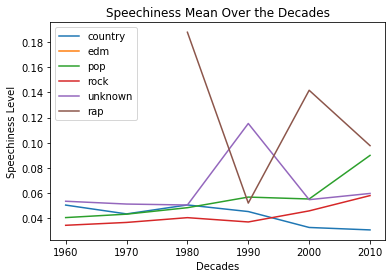

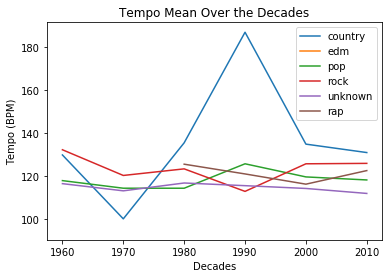

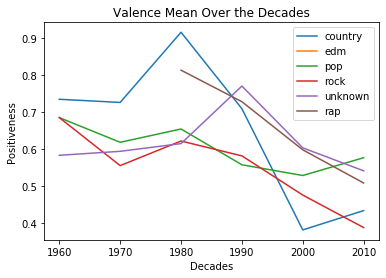

<Figure size 432x288 with 0 Axes>

In [289]:
for metric in metrics_list:
    for g in broad_genres_list:
        plt.plot(genre_by_decade_metrics[genre_by_decade_metrics["broad_genre"] == g].set_index("decade")[metric], label=g);
    plt.legend();
    metric_title = " ".join(metric.split("_")).title()
    plt.title(metric_title + " Over the Decades");
    plt.xlabel("Decades")
    if metric == "acousticness_mean":
        plt.ylabel("Confidence Level")
    elif metric == "danceability_mean":
        plt.ylabel("Danceability Level")
    elif metric == "energy_mean":
        plt.ylabel("Energy Level")
    elif metric == "instrumentalness_mean":
        plt.ylabel("Instrumentalness")
    elif metric == "liveness_mean":
        plt.ylabel("Liveness Level")
    elif metric == "loudness_mean":
        plt.ylabel("Loudness (db)")
    elif metric == "speechiness_mean":
        plt.ylabel("Speechiness Level")
    elif metric == "tempo_mean":
        plt.ylabel("Tempo (BPM)")
    elif metric == "valence_mean":
        plt.ylabel("Positiveness")
    plt.savefig("../images/" + metric + "_decade_by_genre" + ".png")
    plt.figure();

## Overall Metrics

In [273]:
decade_metrics = decades_df.groupby(["decade"]).agg({
                                                        "acousticness":["mean","median"],
                                                        "danceability":["mean","median"],
                                                        "energy":["mean","median"],
                                                        "instrumentalness":["mean","median"],
                                                        "liveness":["mean","median"],
                                                        "loudness":["mean","median"],
                                                        "speechiness":["mean","median"],
                                                        "tempo":["mean","median"],
                                                        "valence":["mean","median"]
                                                       })
decade_metrics.columns = decade_metrics.columns.map("_".join)
# decade_metrics = decade_metrics.reset_index()
decade_metrics

,acousticness_mean,acousticness_median,danceability_mean,danceability_median,energy_mean,energy_median,instrumentalness_mean,instrumentalness_median,liveness_mean,liveness_median,loudness_mean,loudness_median,speechiness_mean,speechiness_median,tempo_mean,tempo_median,valence_mean,valence_median
decade,,,,,,,,,,,,,,,,,,
1960,0.595108,0.67200,0.539575,0.541,0.476661,0.4770,0.137978,0.000021,0.187711,0.1355,-11.422962,-11.4905,0.045750,0.03670,119.461975,117.239,0.650034,0.6480
1970,0.360336,0.33700,0.586706,0.619,0.522502,0.4800,0.052015,0.000076,0.165559,0.1180,-10.492282,-10.0570,0.043542,0.03450,115.011012,112.083,0.598653,0.5880
1980,0.196319,0.12700,0.666651,0.675,0.642096,0.6670,0.015162,0.000023,0.172366,0.1120,-9.512133,-8.5300,0.047736,0.03820,118.391241,117.129,0.650373,0.6660
1990,0.174878,0.07880,0.643506,0.647,0.657544,0.6650,0.021048,0.000005,0.168580,0.1080,-8.161127,-7.5770,0.056075,0.03640,123.038595,121.995,0.590696,0.6280
2000,0.114958,0.04935,0.616383,0.609,0.706149,0.7330,0.017851,0.000000,0.163627,0.1250,-5.707319,-5.4090,0.055467,0.03885,121.953479,118.989,0.511169,0.5185
2010,0.194406,0.07220,0.658707,0.671,0.661630,0.7075,0.018744,0.000000,0.140696,0.1090,-5.824652,-5.5875,0.079986,0.05005,118.991880,119.949,0.544066,0.5255


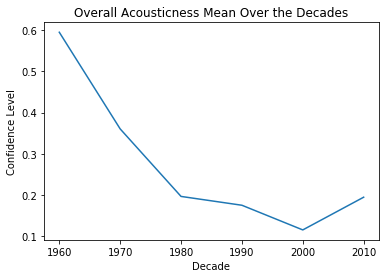

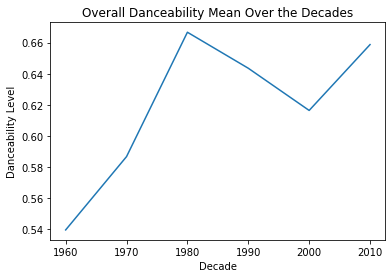

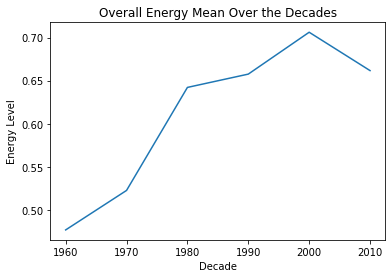

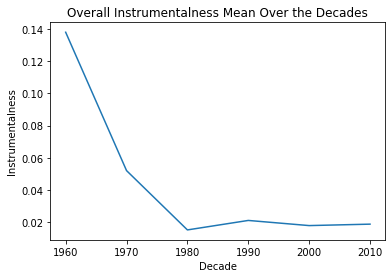

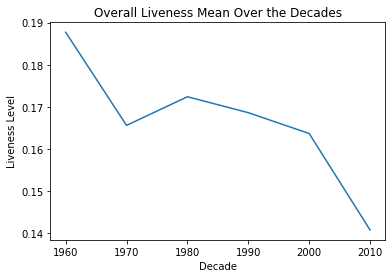

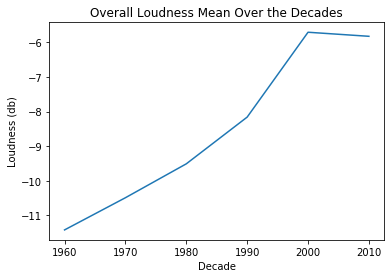

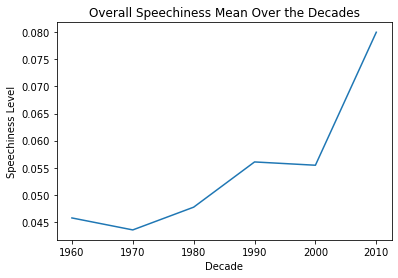

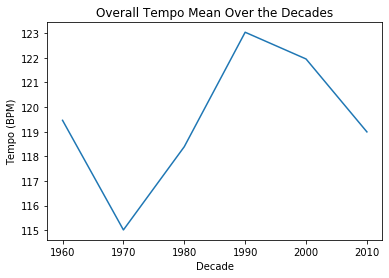

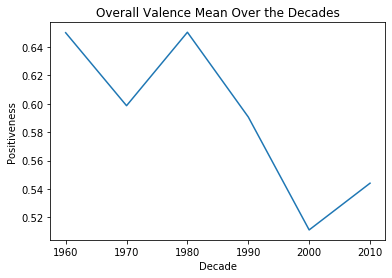

<Figure size 432x288 with 0 Axes>

In [290]:
for metric in metrics_list:
    plt.plot(decade_metrics[metric]);
    metric_title = " ".join(metric.split("_")).title()
    plt.title("Overall " + metric_title + " Over the Decades");
    plt.xlabel("Decade")
    if metric == "acousticness_mean":
        plt.ylabel("Confidence Level")
    elif metric == "danceability_mean":
        plt.ylabel("Danceability Level")
    elif metric == "energy_mean":
        plt.ylabel("Energy Level")
    elif metric == "instrumentalness_mean":
        plt.ylabel("Instrumentalness")
    elif metric == "liveness_mean":
        plt.ylabel("Liveness Level")
    elif metric == "loudness_mean":
        plt.ylabel("Loudness (db)")
    elif metric == "speechiness_mean":
        plt.ylabel("Speechiness Level")
    elif metric == "tempo_mean":
        plt.ylabel("Tempo (BPM)")
    elif metric == "valence_mean":
        plt.ylabel("Positiveness")
    plt.savefig("../images/" + metric + "_decade_overall" + ".png")
    plt.figure();

## Explicit Content

In [159]:
decades_df[decades_df["explicit"]==True]["song"].count()

29

...can't get anything out of this. Sample size of 29 too small